In [1]:
import numpy as np
import pandas as pd
import nltk
from tqdm import tqdm
PATH = "../../classification_dataset.csv"
df = pd.read_csv(PATH)
from nltk.corpus import stopwords
import string
from nltk import word_tokenize

In [2]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /home/yui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yui/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [4]:
lem = WordNetLemmatizer()
stop = set(stopwords.words('english') + list(string.punctuation))
words = set(nltk.corpus.words.words())

In [6]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [7]:
df['filter_text'] = ""
for i in tqdm(range(df.shape[0])):
    df['filter_text'].iloc[i]=" ".join(lem.lemmatize(w,get_wordnet_pos(w)) \
        for w in nltk.wordpunct_tokenize(df['text'].iloc[i].lower()) \
         if w.lower() in words and \
            w.lower() not in stop)

100%|██████████| 342781/342781 [34:25<00:00, 165.96it/s]


In [8]:
df['textcount']=[len(df['filter_text'].iloc[i].split())\
                 for i in range(df.shape[0])]

In [9]:
df['textcount'].describe()

count    342781.000000
mean         37.987105
std          36.402756
min           0.000000
25%          13.000000
50%          26.000000
75%          50.000000
max         372.000000
Name: textcount, dtype: float64

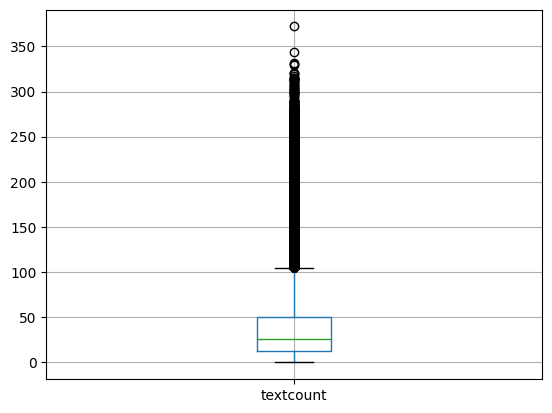

In [10]:
df.boxplot(column=['textcount'])
plt.show()

In [11]:
df.head(4)

,text,l1,l2,l3,filter_text,textcount
0,"Ronald \""Ron\"" D. Boire is an American busines...",Agent,Person,BusinessPerson,businessman executive several noble canada r u,7
1,Astra 1KR is one of the Astra geostationary sa...,Place,Satellite,ArtificialSatellite,one replacement reach orbit launch launch firs...,40
2,Cycleryon is an extinct genus of decapod crust...,Species,Animal,Crustacean,extinct genus decapod type specie live,6
3,"Angela Maria of the Heart of Jesus, also calle...",Agent,Cleric,Saint,maria heart also maria maria march german trin...,12


In [21]:
for i in range(df.shape[0]):
    print(df['text'].iloc[i])
    print(df['filter_text'].iloc[i])
    print('-----------------')
    if i==2:
        break

Ronald \"Ron\" D. Boire is an American businessman. He has served as an executive for several companies, including Barnes & Noble, Brookstone, Sears Canada and Toys R Us.
businessman executive several noble canada r u
-----------------
Astra 1KR is one of the Astra geostationary satellites owned by SES. It was launched in April 2006 as a replacement for Astra 1K, which failed to reach orbit on launch in 2002. The launch of Astra 1KR was the first attempted by SES since the Astra 1K failure. The craft launched to 3.4° east for testing, before moving to Astra 19.2°E, where it replaced Astra 1B, which was effectively decommissioned, and Astra 1C, which was then elderly and running beneath full capacity. It was expected to also replace Astra 2C, which was under-utilised, and to allow that satellite to return to Astra 28.2°E to join 2A/2B/2D to provide additional capacity. However, SES stated that Astra 1L would replace Astra 2C. The first signals from the craft at 19.2° east were direct re

In [23]:
df['filter_text2']=""
for i in tqdm(range(df.shape[0])):
    df['filter_text2'].iloc[i]=\
    " ".join(np.unique(df['filter_text'].iloc[i].split(' ')))

100%|██████████| 342781/342781 [12:41<00:00, 450.26it/s]


In [24]:
df['textcount2']=[len(df['filter_text2'].iloc[i].split())\
                 for i in range(df.shape[0])]

In [25]:
df['textcount2'].describe()

count    342781.000000
mean         28.685411
std          24.549798
min           0.000000
25%          11.000000
50%          21.000000
75%          38.000000
max         208.000000
Name: textcount2, dtype: float64

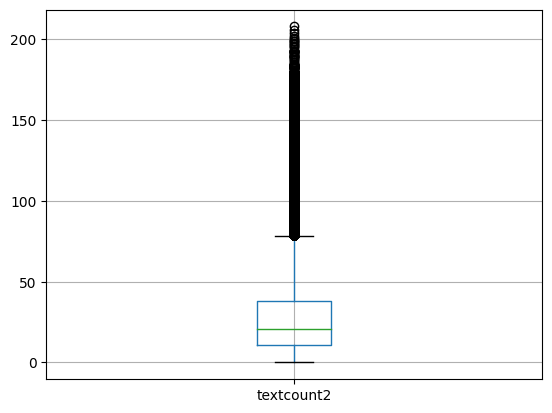

In [26]:
df.boxplot(column=['textcount2'])
plt.show()

In [30]:
len([1 for i in range(df.shape[0]) if df['textcount2'].iloc[i]>100])

7055

In [31]:
7055/342781

0.020581654175698186

In [20]:
with open('../data/tmp.txt','w') as f:
    for i in range(df.shape[0]):
        tar = ",".join([df['l1'].iloc[i].lower(),
                        df['l2'].iloc[i].lower(),
                        df['l3'].iloc[i].lower()])
        dstream = "|".join([df['filter_text'].iloc[i],tar])
        f.write(dstream+"\n")

In [27]:
with open('../data/tmp2.txt','w') as f:
    for i in range(df.shape[0]):
        tar = ",".join([df['l1'].iloc[i].lower(),
                        df['l2'].iloc[i].lower(),
                        df['l3'].iloc[i].lower()])
        dstream = "|".join([df['filter_text2'].iloc[i],tar])
        f.write(dstream+"\n")